## Aula 17: KNN + Grid Search


[10 Algoritmos de Aprendizagem de Máquinas (Machine Learning) que você precisa saber](https://medium.com/@cristianofurquim/10-algoritmos-de-aprendizagem-de-m%C3%A1quinas-machine-learning-que-voc%C3%AA-precisa-saber-c49f9eefe319)

[Machine Learning Basics with the K-Nearest Neighbors Algorithm](https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761)


### Introdução com exemplo numérico

Uma empresa fabrica papel. As principais variáveis na produção são: ácido e dureza do papel. 
Numa pesquisa, usuários classificaram os papéis produzidos em "bom" e "ruim". Um novo tipo de papel foi sugerido, com valores
para as variáveis ácido = 3 e dureza = 7. Baseado nos dados da pesquisa com os usuários,
esse papel seria cosiderado bom ou ruim?

| X1 (ácido) | X2 (dureza) | Y (Opinião do usuário) |
|---|---|---|
| 7          | 7           | Ruim                   |
| 7          | 4           | Ruim                   |
| 3          | 4           | Bom                    |
| 1          | 4           | Bom                    |

*Gráfico dos dados:*

Text(3.2, 7, 'Novo papel')

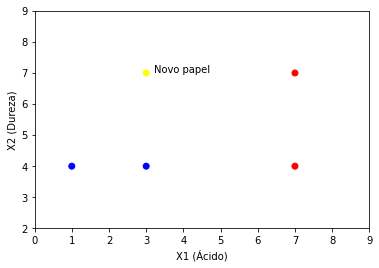

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter([7,7,3,1,3],[7,4,4,4,7],c=['red','red','blue','blue','yellow']);
plt.ylim([2,9]);
plt.xlim([0,9]);
plt.xlabel('X1 (Ácido)');
plt.ylabel('X2 (Dureza)');
plt.text(x=3.2, y=7, s="Novo papel")

*Projeto de novo papel: $X1_{novo}$ = 3; $X2_{novo}$ = 7; K (número de vizinhos) = 1 (decidir pelo mais próximo)* 

*Distância Euclidiana:* $D = \sqrt {(x_{1} - x_{2} )^2 + (y_{1} - y_{2} )^2}$

*Dados da pesquisa com usuários:*

*RESOLUÇÃO:*

| X1 (ácido) | X2 (dureza) | Y (Opinião do usuário) | Distância X_novo | Rank distância |
|---|--- |---|---|--|
| 7          | 7           | Ruim                   | $\sqrt{(7-3)^2 + (7-7)^2} = 4$ | 3 |
| 7          | 4           | Ruim                   | $\sqrt{(7-3)^2 + (4-7)^2} = 5$ | 4 |
| 3          | 4           | Bom                    | $\sqrt{(3-3)^2 + (4-7)^2} = 3$ | 1 |
| 1          | 4           | Bom                    | $\sqrt{(1-3)^2 + (4-7)^2} = 3.6$ | 2 |

**Conclusão (com K = 1):** *seria considerado bom.*

(FONTE: [link](https://people.revoledu.com/kardi/tutorial/KNN/KNN_Numerical-example.html))

**Algoritmo**

1. Recebe um dado não classificado;
2. Mede sua distância (Euclidiana, Manhattan, Minkowski ou Ponderada) de cada observação já classificada;
3. Obtém um *ranking* das distâncias, emordem decrescente;
4. Verifica a classe de cada da um dos *K* dados que tiveram a menor distância e conta a quantidade de cada classe;
5. Toma como resultado a classe que mais apareceu dentre os dados que tiveram as menores distâncias;
6. Classifica o novo dado com a classe tomada como resultado da classificação.

### Exemplo Prático

In [5]:
#Bibliotecas nescessarias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Lendo conjunto de dados

Como exemplo vamos utilizar dados de cancer de mama (os mesmo passados como exemplo na primera aula), eles estão disponiveis no [UCI](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)) ou pelo [kaggle](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data). A ideia desde dado e conseguir classificar cancer entre tumores malignos e benignos 

In [6]:
df_cancer = pd.read_csv('../datasets/breast_cancer.csv')
df_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
df_cancer.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

**Obs:** Podemos perceber que a coluna ID não tras informações uteis para a classificação, devemos retirar a coluna.

In [8]:
df_cancer = df_cancer.drop(['id'],axis=1)

In [9]:
df_cancer

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


#### Análise exploratoria
Antes de iniciarmos o modelo de classificação vamos fazer uma análise exploratoria, escolha alguns valores  veja se conseguimos tirar algumas conclusões sobre a classe dos vinhos.


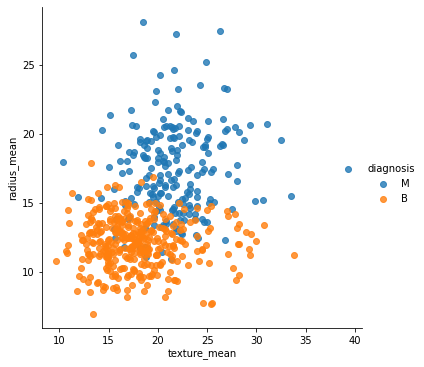

In [10]:
sns.lmplot(data=df_cancer,x='texture_mean',y='radius_mean',
           fit_reg=False,hue='diagnosis')

<AxesSubplot:>

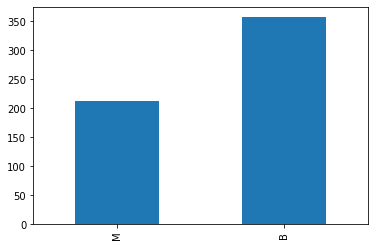

In [11]:
df_cancer['diagnosis'].value_counts().sort_values().plot.bar()

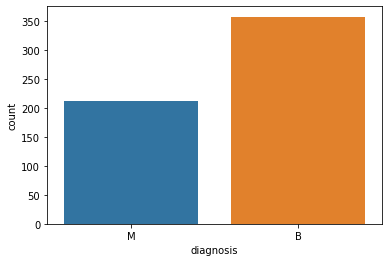

In [12]:
sns.countplot(data=df_cancer,x='diagnosis');

In [13]:
df_cancer['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

**Obs:** Podemos perceber que cancer maiores tentem a ser malignos e a textura parece não influenciar muito na classificação. Além disto os dados estão levemente desbalanceados, tendo mais dados benignos do que malignos. 

### Processo de aprendizado de máquina

Vamos iniciar a processo de criação de modelo de classificação, o primeiro passo que devemos dar é seperar a variavel dependente 'y' das variaveis independetes 'x', em outras palavras, seperar o que pretendemos classificar, neste caso o diagnostico, dos dados que usaremos para esta classificação, todos os demais dados.  

**Separando x e y**

In [14]:
y = df_cancer['diagnosis']
x = df_cancer.drop('diagnosis',axis=1)

**Tratando y**

Outro ponto importante é que os modelos apenas trabalham com dados numericos, sendo assim temos que converter y para um valor numerico. Podemo utilizar a função apply.

In [15]:
y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [16]:
x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [17]:
def tratarY(valor):
    if valor == 'M':
        return 1
    elif valor == 'B':
        return 0
    else:
        return valor
y = y.apply(tratarY)

In [18]:
y.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [19]:
y = y.apply(lambda x: 0 if x=='B' else 1 if x=='M' else x)

In [20]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [21]:
df_cancer.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

**Separando treino e teste**

Separado o x e y nescessitamos separar os dados o conjunto de dados em treino e teste para evitarmos overfit, neste exemplo vamos utilizar um random.seed para que os valores de todos sejam iguais.

In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

**Criando e treinando modelo**

Com os dados separados podemos criar o modelos de classificação KNN, para istamo vamos utilizar uma biblioteca do sklearn

In [23]:
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.cluster import KMeans

In [24]:
#Criando modelo com numero de vizinhos igual a 3
clf_knn = KNeighborsClassifier(n_neighbors=3)
#Treinando modelo com os dados de treino
clf_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

**Predizendo dados de teste**

Com o modelo treinado podemo predizer o conjunto de teste

In [25]:
y_pred = clf_knn.predict(x_test)
y_pred

array([1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0])

### Verificando acuracia em classificação 

Existe uma explicação nos slides.

Com os dados de teste classificados pelo modelo podemos verificar o quanto nosso modelo acerta em sua classificação. Porém como verificamos a acuracia de uma classificação? 

Primeiro precisamos saber que em classificação podemos acertar de duas maneiras (verdadeiro positivo e verdadeiro negativo) e errar de duas maneiras (falso positivo e falso negativo):

- **verdadeiro positivo:** É quando o modelo acerta ao falar que a pessoa tem um cancer maligno 
- **verdadeiro negativo:** É quando o modelo acerta ao falar que a pessoa tem não um cancer maligno
- **falso positivo:** É quando o modelo erra ao falar que a pessoa tem um cancer maligno
- **falso negativo:** É quando o modelo erra ao falar que a pessoa tem não um cancer maligno

Exitem alguns modo de verificar esta acuraciaum uma delas é utilizar da matriz e confusão, ela é uma matriz que diz como cada valor foi predito em comparação de como deveria ser sua predição.

Porém para termos valores numericos podemos utilizar de diferentes formulas, são elas:
    
acuracia: Este valore calcula quantos acertos o modelo teve em comparação ao numero total de dados.
    
precisão: Precissão calcula dentre os valores que o modelo disse ser de uma determinadad classe, quantos ele acertou.
    
revogação ou recall: Calcula dentre os valores que são de uma determinada classe, quantos valores o modelo encontrou.
    
**Ex:** Em uma sala com 10 pessoas, todas sendo homens. Se um modelo dizer que temos apenas 3 homens, ele terá a precisão de 100, afinal todas as pessoas que ele disse ser homem realmente são homens, porém o recall dele é apenas 30% (3/10), pois ele so classificou 3 pessoas como homem enquanto haviam 10.

In [26]:
#Para calculas estes valores iremos usar funções do sklearn.metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from mlxtend.plotting import plot_confusion_matrix

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

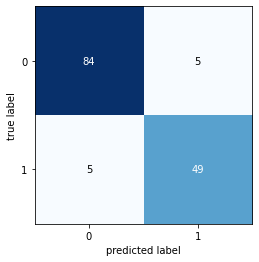

In [27]:
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm)

**matris de confunsão**

In [28]:
print(cm)

[[84  5]
 [ 5 49]]


In [29]:
accuracy_score(y_test,y_pred)

0.9300699300699301

**Precisão e revogação**

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        89
           1       0.91      0.91      0.91        54

    accuracy                           0.93       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.93      0.93      0.93       143



### Tunning KNN

Porém o modelo não apresentou  bons resultados, mas podemos melhorar os dados é os parametros do KNN para que ele tenham uma precissão melhor. Este processo muitas vezes e chamando de tunning do algoritmo, é quando refinamos ele para ter melhores resultados

**Normalizando dados**

O primeiro processo que pode ser feito para tunning do KNN é a normalização dos dados. Devido o Knn utilizar da distancia das variaveis para classificar os dados, ter as variaveis normalizadas garante que uma não tenha mais peso na classificação que outra.

Para normalizar os dados podemos utilziar a classe StandardScaler do sklearn


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

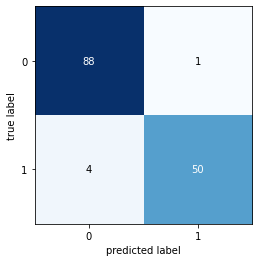

In [31]:
#Normalizando o X
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
x_train_sc = scaler.fit_transform(x_train)

clf_knn = KNeighborsClassifier(n_neighbors=7)
clf_knn.fit(x_train_sc, y_train)

# Criando novamente o modelo de KNN e predizendo os dados para verificar se houve melhora 
# clf_knn = KNeighborsClassifier(n_neighbors=3)

x_test_sc = scaler.fit_transform(x_test)

y_pred_sc = clf_knn.predict(x_test_sc)

cm = confusion_matrix(y_test, y_pred_sc)
plot_confusion_matrix(cm)

In [32]:
accuracy_score(y_pred_sc,y_test)

0.965034965034965

In [33]:
print(classification_report(y_test, y_pred_sc))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        89
           1       0.98      0.93      0.95        54

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



In [34]:
from sklearn.decomposition import PCA

In [35]:
x.shape

(569, 30)

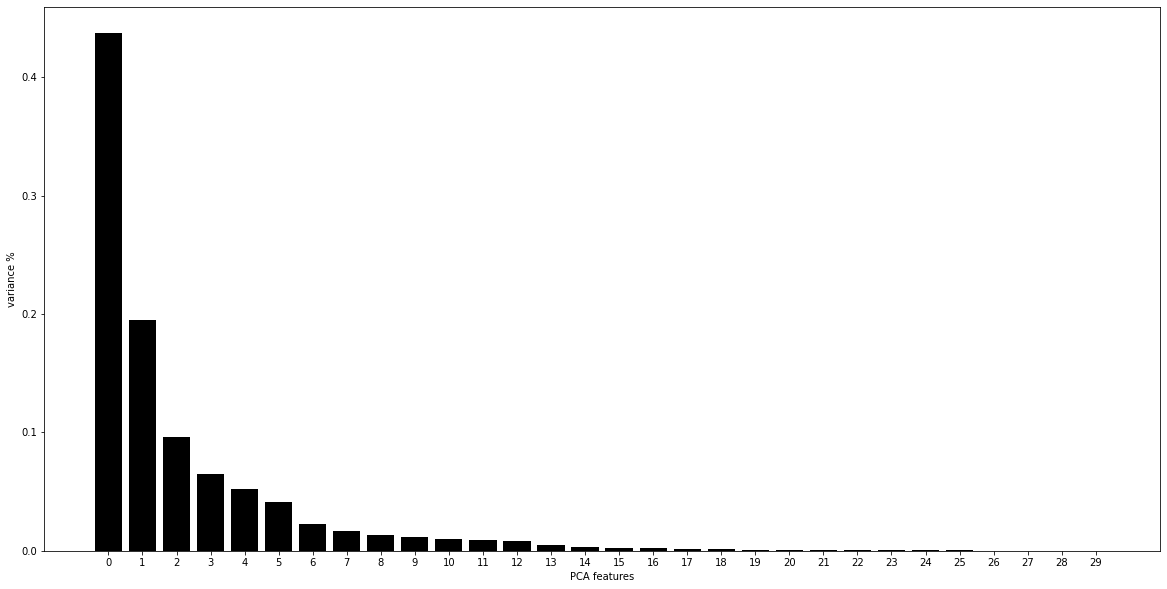

In [36]:
pca = PCA()
principalComponents = pca.fit_transform(x_train_sc)

features = range(pca.n_components_)
plt.figure(figsize=(20, 10))

plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
PCA_components = pd.DataFrame(principalComponents)

In [37]:
pca = PCA(0.9)
principalComponents = pca.fit_transform(x_train_sc)
pca.explained_variance_ratio_.sum()

0.9091994448161509

In [38]:
pca.components_.shape

(7, 30)

In [39]:
y_train

287    0
512    1
402    0
446    1
210    1
      ..
71     0
106    0
270    0
435    1
102    0
Name: diagnosis, Length: 426, dtype: int64

In [40]:
pca.components_.shape

(7, 30)

In [41]:
principalComponents.shape

(426, 7)

In [42]:
pca.components_.shape

(7, 30)

In [43]:
x_train_sc.shape

(426, 30)

In [44]:
pca = PCA(0.9)
principalComponents_train = pca.fit_transform(x_train_sc)

clf_knn = KNeighborsClassifier(n_neighbors=4)

clf_knn.fit(principalComponents_train, y_train)

x_test_sc = scaler.fit_transform(x_test)

pca = PCA(n_components=pca.components_.shape[0])
principalComponents_test = pca.fit_transform(x_test_sc)

y_pred_sc = clf_knn.predict(principalComponents_test)

print(confusion_matrix(y_test, y_pred_sc))
print(accuracy_score(y_pred_sc,y_test))

[[88  1]
 [ 6 48]]
0.951048951048951


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

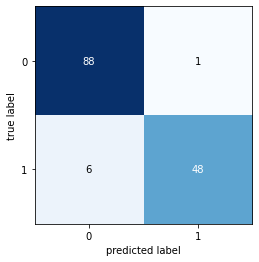

In [45]:
cm = confusion_matrix(y_test, y_pred_sc)
plot_confusion_matrix(cm)

In [46]:
pca = PCA(0.9)
principalComponents_train = pca.fit_transform(x_train_sc)

clf_knn = KNeighborsClassifier(n_neighbors=7, weights='distance')

clf_knn.fit(principalComponents_train, y_train)

x_test_sc = scaler.fit_transform(x_test)

pca = PCA(n_components=pca.components_.shape[0])
principalComponents_test = pca.fit_transform(x_test_sc)

y_pred_sc = clf_knn.predict(principalComponents_test)

print(confusion_matrix(y_test, y_pred_sc))
print(accuracy_score(y_pred_sc,y_test))

[[88  1]
 [ 5 49]]
0.958041958041958


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

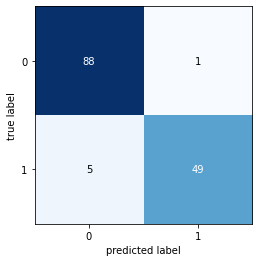

In [47]:
cm = confusion_matrix(y_test, y_pred_sc)
plot_confusion_matrix(cm)

**Pipeline**

In [48]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([('scaler', StandardScaler()),
                 ('pca', PCA(.95)),
                 ('knn',KNeighborsClassifier(n_neighbors=7))])

pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)

print(confusion_matrix(y_test, y_pred))
accuracy_score(y_test,y_pred)

[[86  3]
 [ 3 51]]


0.958041958041958

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

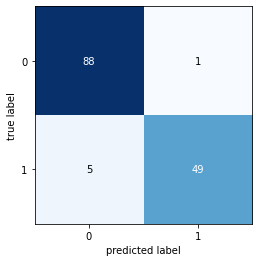

In [49]:
cm = confusion_matrix(y_test, y_pred_sc)
plot_confusion_matrix(cm)

**Gridsearch**

In [50]:
from sklearn.model_selection import GridSearchCV


In [51]:
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([('scaler', StandardScaler()),
                 ('knn', KNeighborsClassifier())])
param_grid = {'knn__n_neighbors': np.arange(1, 20),
              'knn__weights':['uniform', 'distance']}

grid = GridSearchCV(pipe, param_grid, cv=5)

grid.fit(x_train, y_train)
y_pred = grid.predict(x_test)

print(confusion_matrix(y_test, y_pred))
accuracy_score(y_pred,y_test)

[[86  3]
 [ 3 51]]


0.958041958041958

In [52]:
grid.best_params_

{'knn__n_neighbors': 5, 'knn__weights': 'uniform'}

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

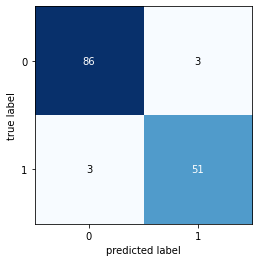

In [53]:
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm)

**Escolhendo o melhor K**

Uma variavel muito importante no Knn é o valor do K, ou seja o numero de vizinhos a ser utilizado para a classificação, assim escolher o melhor K também é algo importante para o tunning do Knn. Para isto podemos utilizar um for, No exemplo abaixo vamos testar k de 1 a 40, iremos salvar o valor de acuracia em lista para posteriomente pordermos plotar um grafico com este valor

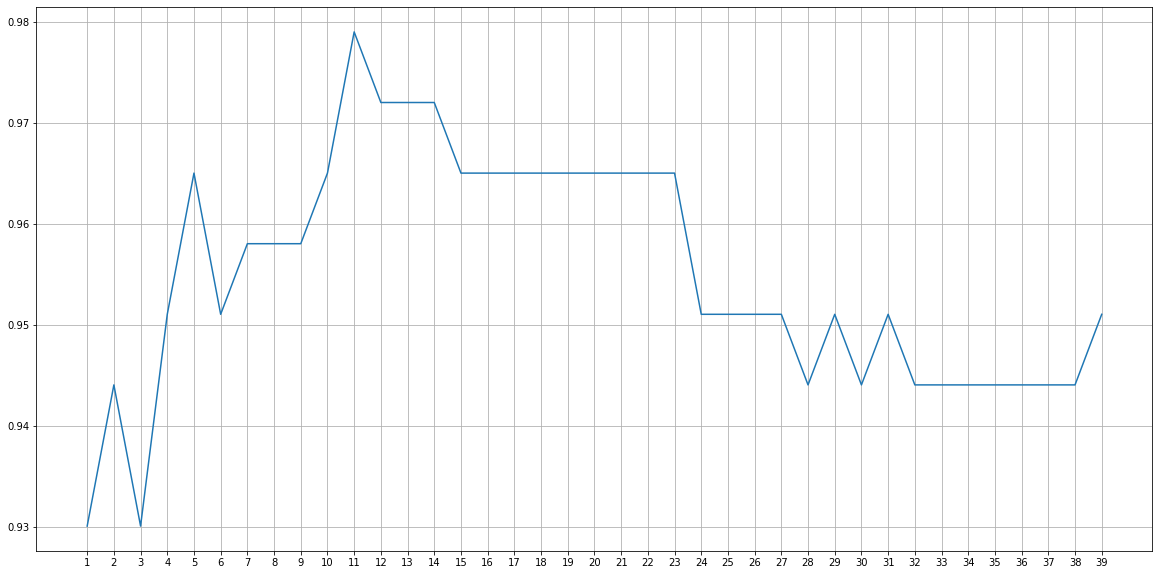

In [54]:
listaAc = []
for k in range(1,40):
    clasf = KNeighborsClassifier(n_neighbors=k)
    clasf.fit(x_train,y_train)
    preditos = clasf.predict(x_test)
    ac = accuracy_score(preditos,y_test)
    listaAc.append(ac)
listaAc = np.array(listaAc)

plt.figure(figsize=(20, 10))
plt.plot(range(1,40), listaAc);
plt.xticks(range(1,40))
plt.grid()

In [55]:
clasf = KNeighborsClassifier(n_neighbors=11)
clasf.fit(x_train,y_train)
preditos = clasf.predict(x_test)
accuracy_score(preditos,y_test)

0.9790209790209791

In [56]:
listaAc.max()

0.9790209790209791

In [57]:
listaAc.argmax()+1

11

In [58]:
print("Valor maximo:",listaAc.max())
print("Numero K do valor maximo:",listaAc.argmax()+1)

Valor maximo: 0.9790209790209791
Numero K do valor maximo: 11


**Alterando peso e metrica de distância**

outros dois paramentros que podemos alterar no KNN é a metrica de distancia de metrica e o calculo de peso para o classificador.

**metrica de Peso:** Em muitas vezes não é justo falar que um dado muito proximo de um dado observado tem o mesmo peso que um dado distante. assim podemos colocar uma metrica de peso aonde os dados mais proximos tem mais influência na classificação do que os mais distantes. 

**metrica de distância:** Normalmente estamos acustumos a calcular a distância segundo a formula de distancia euclidiana, porém exitem outras formulas famosas, como distância de manhattan ou [chebyshev](https://en.wikipedia.org/wiki/Chebyshev_distance). Elas podem ser generalizadas pela formula de distância de [Minkowski](https://en.wikipedia.org/wiki/Minkowski_distance), alterando o valor da variavel p, aonde p igual 2 é a distancia de euclidiana, p igual 1 a distancia de manhattan e p igual ao infinito a distância chebyshev.



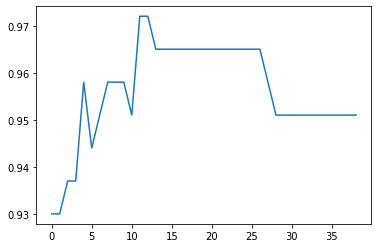

In [59]:
listaAc = []
for k in range(1,40):
    clasf = KNeighborsClassifier(n_neighbors=k,weights='distance')
    clasf.fit(x_train,y_train)
    preditos = clasf.predict(x_test)
    ac = accuracy_score(preditos,y_test)
    listaAc.append(ac)
listaAc = np.array(listaAc)

plt.plot(listaAc);

In [60]:
print("Valor maximo:",listaAc.max())
print("Numero K do valor maximo:",listaAc.argmax()+1)

Valor maximo: 0.972027972027972
Numero K do valor maximo: 12


In [61]:
#Alterando metrica de peso
clasf = KNeighborsClassifier(n_neighbors=12,weights='distance')
clasf.fit(x_train,y_train)
preditos = clasf.predict(x_test)
accuracy_score(preditos,y_test)

0.972027972027972

In [62]:
#Alterando parametro p do peso para 1 (distancia de manhattan) o padrão é 2
clasf = KNeighborsClassifier(n_neighbors=12,p=1)
clasf.fit(x_train,y_train)
preditos = clasf.predict(x_test)
accuracy_score(preditos,y_test)


0.972027972027972

Neste caso não tivemos melhoras porém podemos testar-lo com todos os valores de K

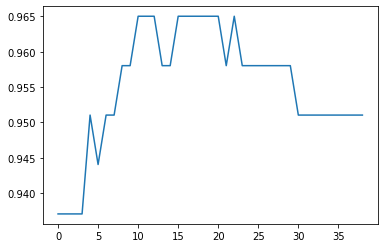

In [63]:
listaAc = []
for k in range(1,40):
    clasf = KNeighborsClassifier(n_neighbors=k,weights='distance', p=1)
    clasf.fit(x_train,y_train)
    preditos = clasf.predict(x_test)
    ac = accuracy_score(preditos,y_test)
    listaAc.append(ac)
listaAc = np.array(listaAc)

plt.plot(listaAc);

In [64]:
print("Valor maximo:",listaAc.max())
print("Numero K do valor maximo:",listaAc.argmax()+1)

Valor maximo: 0.965034965034965
Numero K do valor maximo: 11


Valor maximo: 0.9790209790209791
Numero K do valor maximo: 11


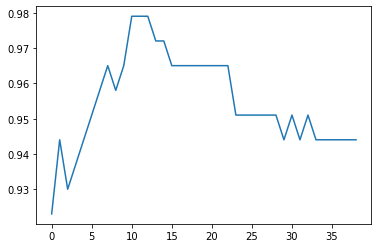

In [65]:
listaAc = []
for k in range(1,40):
    clasf = KNeighborsClassifier(n_neighbors=k, p=3)
    clasf.fit(x_train,y_train)
    preditos = clasf.predict(x_test)
    ac = accuracy_score(preditos,y_test)
    listaAc.append(ac)
listaAc = np.array(listaAc)

plt.plot(listaAc);

print("Valor maximo:",listaAc.max())
print("Numero K do valor maximo:",listaAc.argmax()+1)

Agora precebemos uma melhora significativa, para os valores de p = 1, k = 11 e utilizando distancia como peso, temos um algoritmo com taxa de acerto de 96.5%! 

In [66]:
clasf = KNeighborsClassifier(n_neighbors=11,weights='distance',p=1)
clasf.fit(x_train,y_train)
preditos = clasf.predict(x_test)
print(classification_report(preditos,y_test))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97        90
           1       0.94      0.96      0.95        53

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.97       143



Pro fim vamos verificar como fica a acuracia utilizando uma validação cruzada

In [67]:
from sklearn.model_selection import cross_val_score

clasf = KNeighborsClassifier(n_neighbors=11,weights='distance',p=1)
score = cross_val_score(clasf,y=y,X=x,cv=5)
score

array([0.87719298, 0.92982456, 0.95614035, 0.97368421, 0.95575221])

In [68]:
score.mean()

0.9385188635305077

### Expandindo o KNN para um Problemas de Regressão

Assumindo o conjunto de dados:

![knnreg_dados](../images/knnreg_dados.png)

Visualizando graficamente:

![knnreg_graf](../images/knnreg_graf.png)

Toma-se as distâncias:

![knnreg_dist](../images/knnreg_dist.png)

Define-se os K vizinhos de interesse:

![knnreg_kneig](../images/knnreg_kneig.png)

Computa-se a média dos valores entre os K vizinhos selecionados:

![knnreg_calc](../images/knnreg_kneig_calc.png)

In [69]:
#os dados para o ID11 serão:
height = (5 + 4.8 + 5.8)/3
age = (45 + 40 + 36)/3
weight = (77 + 72 + 60)/3


In [70]:
height, age, weight

(5.2, 40.333333333333336, 69.66666666666667)

In [71]:
from sklearn.neighbors import KNeighborsRegressor

In [72]:
KNeighborsRegressor(n_neighbors=3)

KNeighborsRegressor(n_neighbors=3)

**FONTE:** https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/